Runtime measurements for speedup of the vector addition

(The "sudo -u user" is only necessary in the notebook, as it does not run as standard user by default, i.e. ignore it.)

In [ ]:
%%bash
sudo -u user mpiexec -n 1 python time_measurements.py add > runtime_add.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 2 python time_measurements.py add >> runtime_add.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 4 python time_measurements.py add >> runtime_add.csv

Run time measurements for speedup of the matrix-vector product

In [ ]:
%%bash
sudo -u user mpiexec -n 1 python time_measurements.py mvp > runtime_mvp.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 2 python time_measurements.py mvp >> runtime_mvp.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 4 python time_measurements.py mvp >> runtime_mvp.csv

Run time measurements for weak scaling of the vector addition

In [ ]:
%%bash
sudo -u user mpiexec -n 1 python time_measurements_modified.py add > runtime_weak_add.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 2 python time_measurements_modified.py add >> runtime_weak_add.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 4 python time_measurements_modified.py add >> runtime_weak_add.csv

Run time measurements for weak scaling of the matrix-vector product

In [ ]:
%%bash
sudo -u user mpiexec -n 1 python time_measurements_modified.py mvp > runtime_weak_mvp.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 2 python time_measurements_modified.py mvp >> runtime_weak_mvp.csv

In [ ]:
%%bash
sudo -u user mpiexec -n 4 python time_measurements_modified.py mvp >> runtime_weak_mvp.csv

Now, we start to analyze the data. To this end, we begin by importing some modules...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

This function loads the stored runtimes. I specifically always picks the largest reported value for a given number of processes. It returns the arrays with the numbers of processess and the measured maximum runtime.

In [ ]:
def load_runtime(file_name):

    runtime = dict()
    runtime[1] = 0.0
    runtime[2] = 0.0
    runtime[4] = 0.0

    with open(file_name) as f: # open the file for reading
        for line in f: # iterate over each line
            if len(line)>1: # exclude empty lines / lines with empty character
                n_ranks, current_runtime = line.split() # split it by whitespace
                n_ranks = int(n_ranks) # convert age from string to int
                current_runtime = float(current_runtime) # convert bs from string to float
                runtime[n_ranks] = max(runtime[n_ranks],current_runtime)

    n_procs = [procs for procs in runtime]
    r_time = [runtime[procs] for procs in runtime]

    return n_procs, r_time


Here, we plot the relative speedup or strong scaling. (The shown results correspond to the standard cloud machine, if not re-executed.)

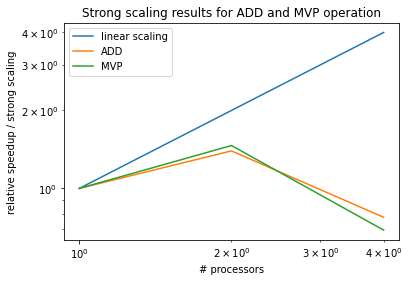

In [ ]:
n_procs, r_time = load_runtime("runtime_add.csv")
plt.loglog(n_procs,n_procs, label="linear scaling")

n_procs, r_time = load_runtime("runtime_add.csv")
plt.loglog(n_procs,r_time[0]/np.array(r_time), label="ADD")

n_procs, r_time = load_runtime("runtime_mvp.csv")
plt.loglog(n_procs,r_time[0]/np.array(r_time), label="MVP")

plt.legend()
plt.xlabel("# processors")
plt.ylabel("relative speedup / strong scaling")
plt.title("Strong scaling results for ADD and MVP operation")
plt.show()

This plots the parallel efficiency.

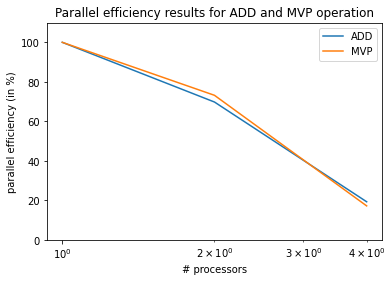

In [ ]:
n_procs, r_time = load_runtime("runtime_add.csv")
plt.semilogx(n_procs,100*r_time[0]/(np.array(n_procs)*np.array(r_time)), label="ADD")

n_procs, r_time = load_runtime("runtime_mvp.csv")
plt.semilogx(n_procs,100*r_time[0]/(np.array(n_procs)*np.array(r_time)), label="MVP")

plt.legend()
plt.xlabel("# processors")
plt.ylabel("parallel efficiency (in %)")
plt.ylim(0, 110)
plt.title("Parallel efficiency results for ADD and MVP operation")
plt.show()

This finally gives the weak scaling efficiency.

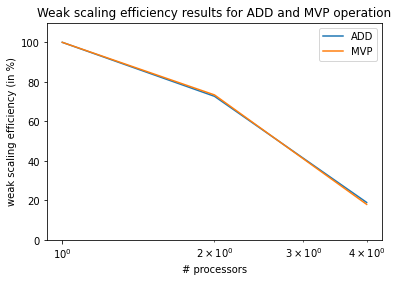

In [ ]:
n_procs, r_time = load_runtime("runtime_weak_add.csv")
plt.semilogx(n_procs,100*r_time[0]/(np.array(r_time)), label="ADD")

n_procs, r_time = load_runtime("runtime_weak_mvp.csv")
plt.semilogx(n_procs,100*r_time[0]/(np.array(r_time)), label="MVP")

plt.legend()
plt.xlabel("# processors")
plt.ylabel("weak scaling efficiency (in %)")
plt.ylim(0, 110)
plt.title("Weak scaling efficiency results for ADD and MVP operation")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8852d374-18a4-4bb5-9abe-21cc7b27fe82' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>